In [ ]:
!pip install chaid
!pip install orca
!pip install graphviz 
!pip install dtreeviz
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 MB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for savReaderWriter: filename=savReaderWriter-3.4.2-py3-none-any.whl size=51142026 sha256=5441bcec7f08662fc511087ab3023d5113692a4ffd00ca6f3daa19d6ce2a04fc
  Stored in directory: /root/.cache/pip/wheels/cb/a1/bf/2b0abba03732dda64bac1510f20b5d34cae4fe071dc0699336
Successfully built savReaderWriter
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 KB 2.0 MB/s eta 0:00:00
--2023-03-30 12:31:52--  https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
from datetime import datetime

Exception ignored in: <module 'collections.abc' from '/usr/lib/python3.9/collections/abc.py'>
Traceback (most recent call last):
  File "<string>", line 1, in <module>
KeyboardInterrupt: 
<frozen importlib._bootstrap>:228: RuntimeWarning: Cython module failed to patch module with custom type


In [ ]:
import orca
import plotly
import plotly.graph_objects as go
from ipywidgets import interactive
from IPython.display import display
from IPython.display import Image
import pandas as pd
import statsmodels.api as sm
from CHAID import Tree

In [ ]:

df = pd.read_csv('/content/Police_Stop_Data2.csv')

SUMMARIZE DATA

In [ ]:
df.info() #summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18568 entries, 0 to 18567
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OBJECTID              18568 non-null  int64  
 1   masterIncidentNumber  18568 non-null  object 
 2   responseDate          18568 non-null  object 
 3   reason                0 non-null      float64
 4   problem               18568 non-null  object 
 5   callDisposition       18172 non-null  object 
 6   citationIssued        0 non-null      float64
 7   personSearch          15710 non-null  object 
 8   vehicleSearch         15710 non-null  object 
 9   preRace               15710 non-null  object 
 10  race                  15710 non-null  object 
 11  gender                15710 non-null  object 
 12  lat                   18568 non-null  float64
 13  long                  18568 non-null  float64
 14  x                     18568 non-null  float64
 15  y                  

In [ ]:
df.head()

,OBJECTID,masterIncidentNumber,responseDate,reason,problem,callDisposition,citationIssued,personSearch,vehicleSearch,preRace,race,gender,lat,long,x,y,policePrecinct,neighborhood,lastUpdateDate
0,1,16-395258,2016/10/31 22:40:47+00,NaN,Suspicious Person (P),BKG-Booking,NaN,YES,NO,Black,Black,Male,44.979570,-93.272570,-1.038306e+07,5.618306e+06,1.0,Downtown West,2017/08/08 10:25:31+00
1,2,16-395296,2016/10/31 23:06:36+00,NaN,Traffic Law Enforcement (P),TAG-Tagged,NaN,NO,NO,Unknown,Black,Male,44.962689,-93.275921,-1.038343e+07,5.615650e+06,5.0,Steven's Square - Loring Heights,2017/08/08 10:26:13+00
2,3,16-395326,2016/10/31 23:20:54+00,NaN,Attempt Pick-Up (P),RFD-Refused,NaN,NO,NO,Unknown,Unknown,Unknown,45.024836,-93.288069,-1.038478e+07,5.625432e+06,4.0,Webber - Camden,2017/08/08 10:24:35+00
3,4,16-395328,2016/10/31 23:23:20+00,NaN,Suspicious Person (P),BKG-Booking,NaN,YES,NO,Black,Black,Male,44.946560,-93.247410,-1.038025e+07,5.613112e+06,3.0,Corcoran,2017/08/08 10:25:31+00
4,5,16-395333,2016/10/31 23:26:05+00,NaN,Suspicious Vehicle (P),GOA-Gone on Arrival,NaN,NO,NO,Other,Unknown,Male,44.906170,-93.255010,-1.038110e+07,5.606762e+06,3.0,Hale,2017/08/08 10:25:03+00


In [ ]:
#unique values
df.apply(pd.Series.nunique)

OBJECTID                18568
masterIncidentNumber    18568
responseDate            18548
reason                      0
problem                     6
callDisposition            24
citationIssued              0
personSearch                2
vehicleSearch               2
preRace                     8
race                        8
gender                      4
lat                      5523
long                     5774
x                        6444
y                        6456
policePrecinct              5
neighborhood               87
lastUpdateDate              7
dtype: int64

In [ ]:
#With shape, we can see dataset have 18568 rows and 19 columns
print(df.shape)

(18568, 19)


In [ ]:
#With isnull().sum(), we can see how many null values have in each column
df.isnull().sum()

OBJECTID                    0
masterIncidentNumber        0
responseDate                0
reason                  18568
problem                     0
callDisposition           396
citationIssued          18568
personSearch             2858
vehicleSearch            2858
preRace                  2858
race                     2858
gender                   2858
lat                         0
long                        0
x                           0
y                           0
policePrecinct            258
neighborhood              258
lastUpdateDate              0
dtype: int64

DISTINC VALUELARIN GÖSTERİMİ


In [ ]:
for col in df.columns:
    print(f"Column name: {col}")
    print(f"Number of unique values: {df[col].nunique()}")
    print(f"Value counts:\n{df[col].value_counts()}\n")

In [ ]:
#Dropping the null values from the preRace and Race columns for the purpose of visualizing these columns.
df_visulize = df.dropna(subset=['preRace', 'race'])

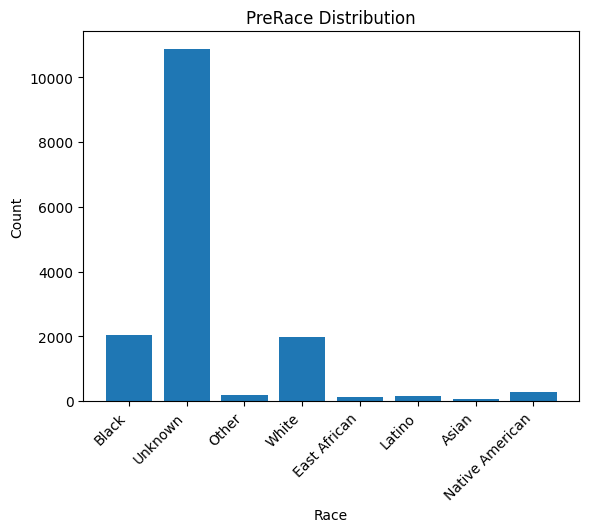

In [ ]:
#Visualizing the preRace column.

pre_race = df_visulize['preRace']

labels = pre_race.unique().tolist()
counts = pre_race.value_counts()
sizes = [counts[i] for i in labels]

fig, ax = plt.subplots()
plt.xticks(rotation=45, ha='right')
ax.bar(labels, sizes)
ax.set_xlabel('Race')
ax.set_ylabel('Count')
ax.set_title('PreRace Distribution')
plt.show()

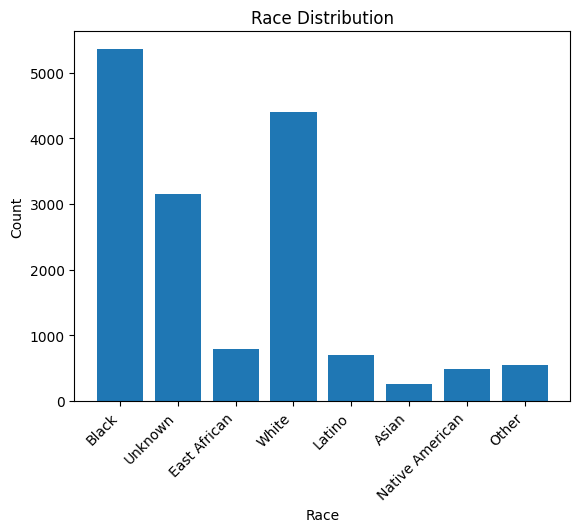

In [ ]:
#Visualizing the Race column. 
race = df_visulize['race']

labels = race.unique().tolist()
counts = race.value_counts()
sizes = [counts[i] for i in labels]

fig, ax = plt.subplots()
plt.xticks(rotation=45, ha='right')
ax.bar(labels, sizes)
ax.set_xlabel('Race')
ax.set_ylabel('Count')
ax.set_title('Race Distribution')
plt.show()

**I found the Accuracy match rate of PreRace and Race values suprisingly  low.**

In [ ]:
filtered_df = df[(df['preRace'] != "unknown") & (df['race'] != "unknown")]
match = sum(filtered_df['preRace'] == filtered_df['race']) / len(filtered_df)

In [ ]:
print('Accuracy match rate of PreRace and Race : {:.2%}'.format(match))

Accuracy match rate of PreRace and Race : 36.06%


In [ ]:
#Dropping the NUll values ​​of that column to visualize the gender column
df_visulize_gender = df.dropna(subset=['gender'])

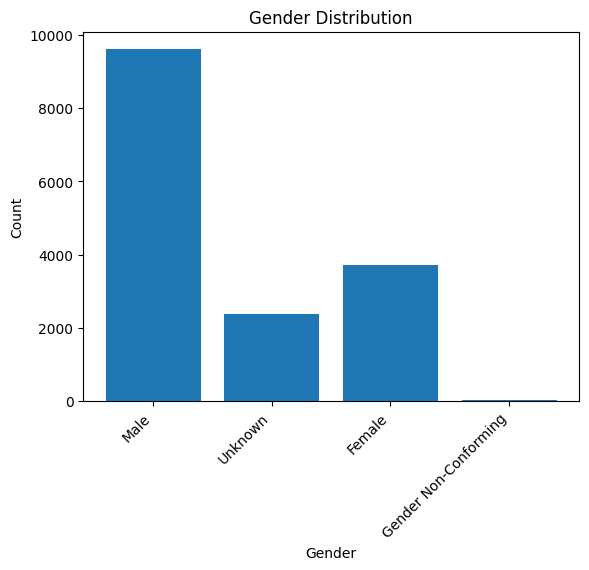

In [ ]:
gender = df_visulize_gender['gender']

labels = gender.unique().tolist()
counts = gender.value_counts()
sizes = [counts[i] for i in labels]

fig, ax = plt.subplots()
plt.xticks(rotation=45, ha='right')
ax.bar(labels, sizes)
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Gender Distribution')
plt.show()

**Converted the date_column to date_type and grouped it, then created hour_group and assigned values to intervals based on this group.**

In [ ]:
import datetime
from datetime import datetime, time

In [ ]:
df = pd.read_csv('/content/Police_Stop_Data2.csv')

df['responseDate'] = pd.to_datetime(df['responseDate'], format='%Y/%m/%d %H:%M:%S')
df['responseDate'] = pd.to_datetime(df['responseDate'].dt.strftime('2023-01-01 %H:%M:%S'))
df.head()

,OBJECTID,masterIncidentNumber,responseDate,reason,problem,callDisposition,citationIssued,personSearch,vehicleSearch,preRace,race,gender,lat,long,x,y,policePrecinct,neighborhood,lastUpdateDate
0,1,16-395258,2023-01-01 22:40:47,NaN,Suspicious Person (P),BKG-Booking,NaN,YES,NO,Black,Black,Male,44.979570,-93.272570,-1.038306e+07,5.618306e+06,1.0,Downtown West,2017/08/08 10:25:31+00
1,2,16-395296,2023-01-01 23:06:36,NaN,Traffic Law Enforcement (P),TAG-Tagged,NaN,NO,NO,Unknown,Black,Male,44.962689,-93.275921,-1.038343e+07,5.615650e+06,5.0,Steven's Square - Loring Heights,2017/08/08 10:26:13+00
2,3,16-395326,2023-01-01 23:20:54,NaN,Attempt Pick-Up (P),RFD-Refused,NaN,NO,NO,Unknown,Unknown,Unknown,45.024836,-93.288069,-1.038478e+07,5.625432e+06,4.0,Webber - Camden,2017/08/08 10:24:35+00
3,4,16-395328,2023-01-01 23:23:20,NaN,Suspicious Person (P),BKG-Booking,NaN,YES,NO,Black,Black,Male,44.946560,-93.247410,-1.038025e+07,5.613112e+06,3.0,Corcoran,2017/08/08 10:25:31+00
4,5,16-395333,2023-01-01 23:26:05,NaN,Suspicious Vehicle (P),GOA-Gone on Arrival,NaN,NO,NO,Other,Unknown,Male,44.906170,-93.255010,-1.038110e+07,5.606762e+06,3.0,Hale,2017/08/08 10:25:03+00


In [ ]:
bins = pd.IntervalIndex.from_tuples([
    (pd.to_datetime('2023-01-01 00:00:00'), pd.to_datetime('2023-01-01 05:59:59')),
    (pd.to_datetime('2023-01-01 06:00:00'), pd.to_datetime('2023-01-01 11:59:59')),
    (pd.to_datetime('2023-01-01 12:00:00'), pd.to_datetime('2023-01-01 17:59:59')),
    (pd.to_datetime('2023-01-01 18:00:00'), pd.to_datetime('2023-01-01 23:59:59')),
])

labels = [0, 1, 2, 3]
df['hour_group'] = pd.cut(df['responseDate'], bins=bins, labels=labels, include_lowest=True)
label_dict = {bins[i]: labels[i] for i in range(len(bins))}
df['hour_group'] = df['hour_group'].apply(lambda x: label_dict[x])


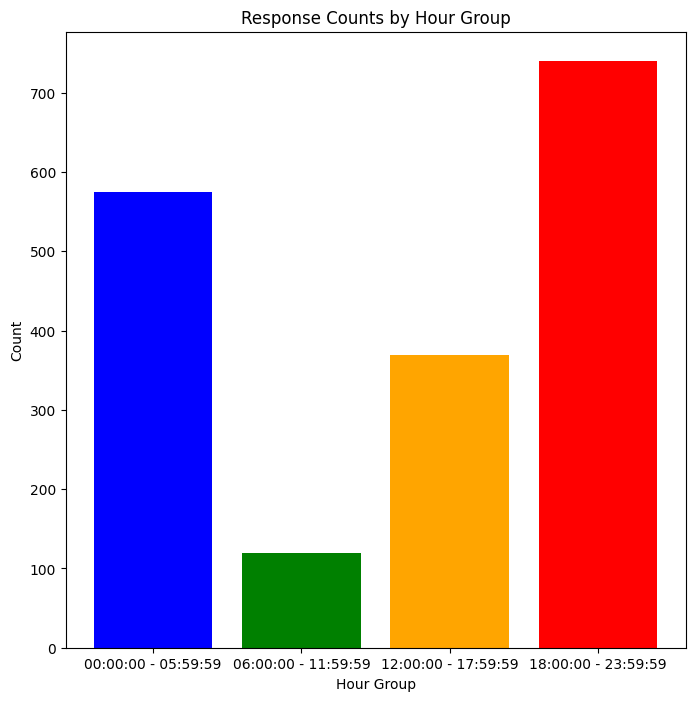

In [ ]:
colors = ['blue', 'green', 'orange', 'red']
# Gruplanmış verileri hesapla
#hour_group_counts = df['hour_group'].value_counts().sort_index()
hour_group_counts = df[df['personSearch'] == 'YES']['hour_group'].value_counts().sort_index()

# Bar grafiği çiz
fig, ax = plt.subplots(figsize=(8, 8))
ax.bar([f"{i.left.strftime('%H:%M:%S')} - {i.right.strftime('%H:%M:%S')}" for i in bins],hour_group_counts.values , color=colors)

# Set the x-axis label and the title
plt.xlabel('Hour Group')
plt.ylabel('Count')
plt.title('Response Counts by Hour Group')

# Show the plot
plt.show()

**HOUR_GROUP , PROBLEM , PERSONSEARCH , PRERACE , GENDER ,NEIGHBORHOOD WILL USE**

**DROPING UNUSED COLUMNS**

In [ ]:
df = df.drop(['OBJECTID','masterIncidentNumber','responseDate','reason','citationIssued','callDisposition','vehicleSearch','race','lat','long','x','y','policePrecinct','lastUpdateDate','neighborhood'],axis=1)

In [ ]:
df.head()

,problem,personSearch,preRace,gender,hour_group
0,Suspicious Person (P),YES,Black,Male,3
1,Traffic Law Enforcement (P),NO,Unknown,Male,3
2,Attempt Pick-Up (P),NO,Unknown,Unknown,3
3,Suspicious Person (P),YES,Black,Male,3
4,Suspicious Vehicle (P),NO,Other,Male,3


**CONVERTING ALL COLUMNS TO CATEROGICAL VALUEE**

In [ ]:
#Drop null values

df = df.dropna()

In [ ]:
df.head()

,problem,personSearch,preRace,gender,hour_group
0,Suspicious Person (P),YES,Black,Male,3
1,Traffic Law Enforcement (P),NO,Unknown,Male,3
2,Attempt Pick-Up (P),NO,Unknown,Unknown,3
3,Suspicious Person (P),YES,Black,Male,3
4,Suspicious Vehicle (P),NO,Other,Male,3


In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    num_unique = len(unique_values)
    print(f"Sütun: {column}")
    print(f"Benzersiz Değerler: {unique_values}")
    print(f"Benzersiz Değer Sayısı: {num_unique}")
    print(f"Type : {df[column].dtypes}\n")

In [ ]:
df2 = pd.get_dummies(df, columns=['preRace', 'gender','problem',"personSearch"], drop_first=True)

df2.head()


,hour_group,preRace_Black,preRace_East African,preRace_Latino,preRace_Native American,preRace_Other,preRace_Unknown,preRace_White,gender_Gender Non-Conforming,gender_Male,gender_Unknown,problem_Curfew Violations (P),problem_Suspicious Person (P),problem_Suspicious Vehicle (P),problem_Traffic Law Enforcement (P),problem_Truancy (P),personSearch_YES
0,3,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,3,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
4,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
X_names = df2.drop(columns = 'personSearch_YES').columns
print(X_names)
print(len(X_names))

y_name = 'personSearch_YES'


Index(['hour_group', 'preRace_Black', 'preRace_East African', 'preRace_Latino',
       'preRace_Native American', 'preRace_Other', 'preRace_Unknown',
       'preRace_White', 'gender_Gender Non-Conforming', 'gender_Male',
       'gender_Unknown', 'problem_Curfew Violations (P)',
       'problem_Suspicious Person (P)', 'problem_Suspicious Vehicle (P)',
       'problem_Traffic Law Enforcement (P)', 'problem_Truancy (P)'],
      dtype='object')
16


In [ ]:
model = Tree.from_pandas_df(df2,
                            dict(zip(X_names, 
                                     ['ordinal']*1 + ['nominal']*15)),
                            y_name,
                            max_depth=2)

In [ ]:
print(model.print_tree())

([], {0: 5680.0, 1: 1071.0}, (gender_Unknown, p=6.61905179292131e-126, score=569.6714012511322, groups=[[0], [1]]), dof=1))
|-- ([0], {0: 3517.0, 1: 1061.0}, (hour_group, p=1.6672744147339828e-16, score=76.57262508179569, groups=[[0], [1], [2], [3]]), dof=3))
|   |-- ([0], {0: 727.0, 1: 315.0}, <Invalid Chaid Split> - the max depth has been reached)
|   |-- ([1], {0: 590.0, 1: 87.0}, <Invalid Chaid Split> - the max depth has been reached)
|   |-- ([2], {0: 1009.0, 1: 264.0}, <Invalid Chaid Split> - the max depth has been reached)
|   +-- ([3], {0: 1191.0, 1: 395.0}, <Invalid Chaid Split> - the max depth has been reached)
+-- ([1], {0: 2163.0, 1: 10.0}, (problem_Suspicious Person (P), p=7.697042787546807e-06, score=20.01168370135069, groups=[[0], [1]]), dof=1))
    |-- ([0], {0: 1581.0, 1: 1.0}, <Invalid Chaid Split> - the max depth has been reached)
    +-- ([1], {0: 582.0, 1: 9.0}, <Invalid Chaid Split> - the max depth has been reached)

None


In [ ]:
model.render(path=None, view=False)

**OUTCOME**

**Based on the model image, it appears that the initial determining factor is Pre_Black, which strongly suggests the presence of racial bias within the Minneapolis police.**
